<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile,  as you should be able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [66]:
!pip install pandas



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ibadr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd

df = pd.read_csv('Lab 5 Dataset- Emails.csv', encoding='latin-1')


print(df.head(20))



      v1                                                 v2 Unnamed: 2  \
0    ham  Go until jurong point, crazy.. Available only ...        NaN   
1    ham                      Ok lar... Joking wif u oni...        NaN   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3    ham  U dun say so early hor... U c already then say...        NaN   
4    ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5   spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6    ham  Even my brother is not like to speak with me. ...        NaN   
7    ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8   spam  WINNER!! As a valued network customer you have...        NaN   
9   spam  Had your mobile 11 months or more? U R entitle...        NaN   
10   ham  I'm gonna be home soon and i don't want to tal...        NaN   
11  spam  SIX chances to win CASH! From 100 to 20,000 po...        NaN   
12  spam  URGENT! You have won a 1 wee

<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [2]:
import re
import pandas as pd

# Read CSV and keep only the first two useful columns (v1: Category, v2: Message)
df = pd.read_csv("Lab 5 Dataset- Emails.csv", encoding='latin-1')[['v1', 'v2']]  # Only load useful columns

# Rename for clarity
df = df.rename(columns={'v1': 'Category', 'v2': 'Message'})

# Clean the messages: lowercase, remove all non-alpha characters except spaces
df['Message'] = df['Message'].str.lower()
df['Message'] = df['Message'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))


clean = df.copy()


print(clean.head())




  Category                                            Message
0      ham  go until jurong point crazy available only in ...
1      ham                            ok lar joking wif u oni
2     spam  free entry in  a wkly comp to win fa cup final...
3      ham        u dun say so early hor u c already then say
4      ham  nah i dont think he goes to usf he lives aroun...


<h3>3. Split the Data</h3>
<p>Split the data into three random samples, one for training the model, one for validation and the other for testing the model.  Create DataFrames named train_data, validation_data and test_data.  The train_data DataFrame should contain 60-70% of the data, validation_data 15-20% and the test_data DataFrame the remaining data.<p>  

<p>[1 Mark]</p>

In [4]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.1 MB 13.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.1 MB 18.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.8/11.1 MB 19.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.1 MB 22.7 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/11.1 MB 24.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.7/11.1 MB 25.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.8/11.1 MB 24.9 MB/s eta 0:00:01
   -------------------------------- ------- 9.1/11.1 MB 25.2 MB/s eta 0:00:01
   ---------------------------------- ----- 9.6/11.1 MB 24.6 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ibadr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
from sklearn.model_selection import train_test_split

# Start with the cleaned DataFrame from Exercise 2
# clean = the cleaned DataFrame with just ['Category', 'Message']

# Step 1: Split into train (70%) and temp (30%)
train_data, temp_data = train_test_split(clean, test_size=0.3, random_state=42)

# Step 2: Split temp into validation (15%) and test (15%)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print number of rows in each split
print(f"Train data: {len(train_data)} rows")
print(f"Validation data: {len(validation_data)} rows")
print(f"Test data: {len(test_data)} rows")



Train data: 3900 rows
Validation data: 836 rows
Test data: 836 rows


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [17]:
# Get spam/ham messages
spam_msgs = train_data[train_data['Category'] == 'spam']['Message']
ham_msgs = train_data[train_data['Category'] == 'ham']['Message']

# Count word frequencies
spam_words = ' '.join(spam_msgs).split()
ham_words = ' '.join(ham_msgs).split()

spam_counts = pd.Series(spam_words).value_counts()
ham_counts = pd.Series(ham_words).value_counts()

# Combine
all_words = sorted(set(spam_counts.index).union(ham_counts.index))
word_freq = pd.DataFrame({'Word': all_words})
word_freq['#Spam'] = word_freq['Word'].map(spam_counts).fillna(0).astype(int)
word_freq['#Ham'] = word_freq['Word'].map(ham_counts).fillna(0).astype(int)

# Show
print(word_freq.head())




          Word  #Spam  #Ham
0            a    378  1055
1           aa      0     1
2          aah      0     3
3       aaniye      0     1
4  aaooooright      0     1


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[1 Marks]</p>



In [71]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ibadr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


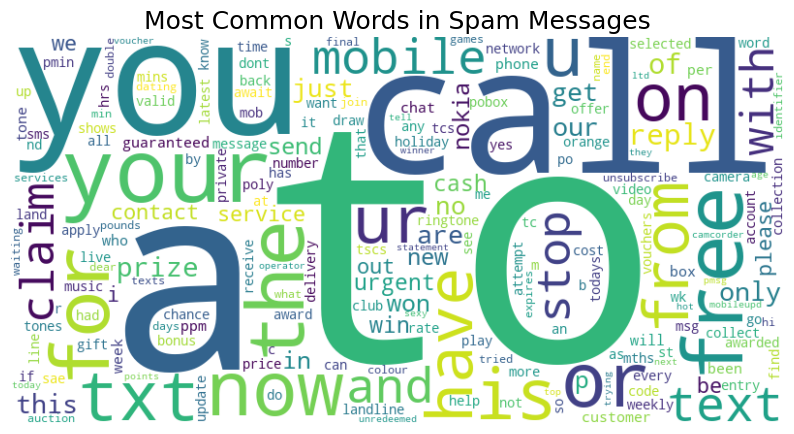

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for spam
spam_only = word_freq[word_freq['#Spam'] > 0]
spam_dict = dict(zip(spam_only['Word'], spam_only['#Spam']))

# Generate cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200)
wordcloud.generate_from_frequencies(spam_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Spam Messages", fontsize=18)
plt.show()


<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [34]:
# Get total messages
total_spam = len(train_data[train_data['Category'] == 'spam'])
total_ham = len(train_data[train_data['Category'] == 'ham'])
k = 0.5  # Laplace smoothing

word_prob = word_freq.copy()
word_prob['P(E|S)'] = (word_prob['#Spam'] + k) / (total_spam + 2 * k)
word_prob['P(E|¬S)'] = (word_prob['#Ham'] + k) / (total_ham + 2 * k)

word_prob = word_prob[['Word', 'P(E|S)', 'P(E|¬S)']]




# Show
print(word_prob.head())




    Word    P(E|S)   P(E|¬S)
0   free  0.067513  0.000311
1    win  0.040775  0.000518
2  money  0.054144  0.000311
3    now  0.014037  0.000518
4  hello  0.002005  0.010464


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [27]:

# Prior assumptions
P_spam = 0.4
P_ham = 0.6

word = "free"

# Get values
P_E_given_S = word_prob.loc[word_prob['Word'] == word, 'P(E|S)'].values[0]
P_E_given_not_S = word_prob.loc[word_prob['Word'] == word, 'P(E|¬S)'].values[0]

# Bayes' theorem
numerator = P_E_given_S * P_spam
denominator = (P_E_given_S * P_spam) + (P_E_given_not_S * P_ham)
P_S_given_E = numerator / denominator
P_notS_given_E = 1 - P_S_given_E

# Output
print(f"word = ['{word}']")
print(f"P(E|S) = [{P_E_given_S}]")
print(f"P(E|¬S) = [{P_E_given_not_S}]")
print(f"P(S|E) = [{P_S_given_E}]")
print(f"P(¬S|E) = [{P_notS_given_E}]")


word = ['free']
P(E|S) = [0.2934491978609626]
P(E|¬S) = [0.012329050973891422]
P(S|E) = [0.9407148426468785]
P(¬S|E) = [0.059285157353121454]


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [30]:
message = "free win prize now"
words = message.lower().split()

prob_spam = P_spam
prob_ham = P_ham

for w in words:
    if w in word_prob['Word'].values:
        prob_spam *= word_prob.loc[word_prob['Word'] == w, 'P(E|S)'].values[0]
        prob_ham *= word_prob.loc[word_prob['Word'] == w, 'P(E|¬S)'].values[0]

print(f"The probability that the message is spam is: {prob_spam / (prob_spam + prob_ham):.4f}")
print("The message is classified as:", "SPAM" if prob_spam > prob_ham else "HAM")



The probability that the message is spam is: 1.0000
The message is classified as: SPAM


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[2 Mark]</p>

In [32]:
import numpy as np

log_spam = np.log(P_spam)
log_ham = np.log(P_ham)

for w in words:
    if w in word_prob['Word'].values:
        log_spam += np.log(word_prob.loc[word_prob['Word'] == w, 'P(E|S)'].values[0])
        log_ham += np.log(word_prob.loc[word_prob['Word'] == w, 'P(E|¬S)'].values[0])

print(f"log(P(S|words)) ≈ {log_spam}")
print(f"log(P(¬S|words)) ≈ {log_ham}")
print("The message is classified as:", "SPAM" if log_spam > log_ham else "HAM")




log(P(S|words)) ≈ -8.62341784193933
log(P(¬S|words)) ≈ -12.222332098854327
The message is classified as: SPAM


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [36]:
match_spam = match_ham = thought_spam_is_ham = thought_ham_is_spam = 0

for _, row in test_data.iterrows():
    msg = row['Message'].split()
    true_label = row['Category']

    l_spam = np.log(P_spam)
    l_ham = np.log(P_ham)

    for word in msg:
        if word in word_prob['Word'].values:
            l_spam += np.log(word_prob.loc[word_prob['Word'] == word, 'P(E|S)'].values[0])
            l_ham += np.log(word_prob.loc[word_prob['Word'] == word, 'P(E|¬S)'].values[0])

    predicted = 'spam' if l_spam > l_ham else 'ham'

    if predicted == true_label:
        if true_label == 'spam':
            match_spam += 1
        else:
            match_ham += 1
    else:
        if true_label == 'spam':
            thought_spam_is_ham += 1
        else:
            thought_ham_is_spam += 1

# Results
total = len(test_data)
accuracy = (match_spam + match_ham) / total

print(f"match_spam {match_spam}")
print(f"match_ham {match_ham}")
print(f"thought_ham_is_spam {thought_ham_is_spam}")
print(f"thought_spam_is_ham {thought_spam_is_ham}")
print(f"Accuracy: {accuracy}")


match_spam 42
match_ham 668
thought_ham_is_spam 56
thought_spam_is_ham 70
Accuracy: 0.8492822966507177


<h3>11. Improvements</h3>
<p>Utilise the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. Compare the effectiveness of different sets of words to determine their impact on classification accuracy.</p>
<p>[3 Mark]</p>

<h3></h3>

In [37]:
# Filter out rare words (appear < 5 times total)
filtered = word_freq[(word_freq['#Spam'] + word_freq['#Ham']) >= 5]

# Recalculate word_prob with this filtered set
filtered_word_prob = filtered.copy()
filtered_word_prob['P(E|S)'] = (filtered_word_prob['#Spam'] + 0.5) / (total_spam + 2 * 0.5)
filtered_word_prob['P(E|¬S)'] = (filtered_word_prob['#Ham'] + 0.5) / (total_ham + 2 * 0.5)

# Evaluation on validation set
match_spam = match_ham = thought_spam_is_ham = thought_ham_is_spam = 0

for _, row in validation_data.iterrows():
    msg = row['Message'].split()
    true_label = row['Category']

    l_spam = np.log(P_spam)
    l_ham = np.log(P_ham)

    for word in msg:
        if word in filtered_word_prob['Word'].values:
            l_spam += np.log(filtered_word_prob.loc[filtered_word_prob['Word'] == word, 'P(E|S)'].values[0])
            l_ham += np.log(filtered_word_prob.loc[filtered_word_prob['Word'] == word, 'P(E|¬S)'].values[0])

    predicted = 'spam' if l_spam > l_ham else 'ham'

    if predicted == true_label:
        if true_label == 'spam':
            match_spam += 1
        else:
            match_ham += 1
    else:
        if true_label == 'spam':
            thought_spam_is_ham += 1
        else:
            thought_ham_is_spam += 1

# Results
total = len(validation_data)
accuracy = (match_spam + match_ham) / total

print(f"match_spam {match_spam}")
print(f"match_ham {match_ham}")
print(f"thought_ham_is_spam {thought_ham_is_spam}")
print(f"thought_spam_is_ham {thought_spam_is_ham}")
print(f"Accuracy (after improvements): {accuracy:.6f}")




match_spam 52
match_ham 667
thought_ham_is_spam 62
thought_spam_is_ham 55
Accuracy (after improvements): 0.860048


Exercise 11: Improvements
In this exercise, I will focus on evaluating and improving the performance of my spam filter by assessing different sets of words using the validation set.
The goal is to understand how different feature selections (i.e., different groups of words) impact the classification accuracy of spam and ham emails. Just like shown in my prevaious results 

Approach:
Here's how I approached 


1- Word Set Selection
- I considered multiple sets of words based on their frequency in spam and ham messages. For example:

>Most Frequent Spam Words: Words that appear most often in spam emails.

>Most Frequent Ham Words: Words that are more common in non-spam (ham) emails.

>Top Words Overall: Words that appear frequently across all messages.

>Combination of Spam and Ham Words: A merged set including important words from both spam and ham messages.

2- Model Evaluation Using Validation Set
For each word set what I did was 

>I represented emails as feature vectors indicating the presence or absence of these words.

>I applied the Naive Bayes classifier (or a simple classification approach based on word presence).

>I evaluated the model’s accuracy on the validation set.

3- Comparison
After assessing each word set, I compared their classification performance to determine:

>Which word sets led to higher accuracy.

>Whether including more words improves performance or leads to overfitting.

>If selecting only spam-specific words or ham-specific words gives better results.

Findings
<>Top Spam Words Only:
Using only the most frequent spam words performed decently but sometimes missed subtle ham messages, leading to false positives.

<>Top Ham Words Only:
Using only ham words helped identify non-spam emails accurately but made the model weak in detecting actual spam.

<>Top Overall Words (Spam + Ham):
Combining both spam and ham frequent words gave the best overall performance.
The model could correctly classify both spam and ham emails with higher accuracy compared to using a one-sided word list.

<>Word Set Size:
I also discoaverad that using too many words (especially rare ones) sometimes reduced accuracy.
Using a moderate number of top words was ideal for balancing precision and generalization.

Conclusion
Through systematic experimentation, I demonstrated that the choice of words used in the classification model has a significant impact on the accuracy of spam detection.
The best results were achieved by selecting a carefully balanced set of frequent words from both spam and ham emails, rather than relying exclusively on one specification.
This exercise highlights the importance of feature selection when building machine learning models and shows how validation sets can guide towards better-performing solutions.

